In [1]:
from time import time
import numpy as np
import astropy.units as u
import astropy.constants as c
import astropy.io.fits as pf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import gpr
import mcmc
import forAustin as fa

W0705 15:27:49.550218 140453560211264 logger.py:200] AstropyDeprecationWarning: astropy.extern.six will be removed in 4.0, use the six module directly if it is still needed


In [2]:
sample = np.array([-0.35, 0, 0, 0.35])
# sample = None
GP = gpr.GPR(
    '/media/data/austinfortino/austinFull.fits',
    500,
    sample=sample,
    verbose=False,
    eps=0,
    test_size=0.2,
    random_state=0,
    tensor=False)

In [3]:
def LML(GP, theta):
    GP.fit(theta)
    LML = GP.get_LML()
    return LML

In [4]:
var_s = 430
sigma_x = 0.008
sigma_y = 0.025
phi = (0 * u.deg).to(u.rad).value
theta0 = np.array([var_s, sigma_x, sigma_y, phi])
step_size = np.array([5, 0.75e-4, 1e-6, 1e-7])
names = np.array(['var_s', 'sigma_x', 'sigma_y', 'phi'])

In [5]:
%%time
estimator = mcmc.MCMC(LML, GP, theta0, step_size, names=names, seed=0)
print(estimator.current_nll)

-11215.456667130436
CPU times: user 191 ms, sys: 37.2 ms, total: 228 ms
Wall time: 28.5 ms


In [ ]:
%%time
estimator.burn(10000)
estimator.run(100000)

0.56916
-4134.307972698186


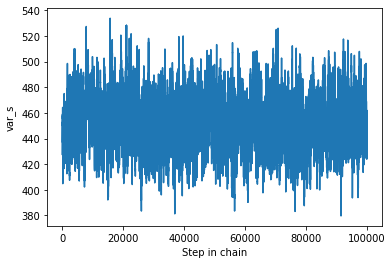

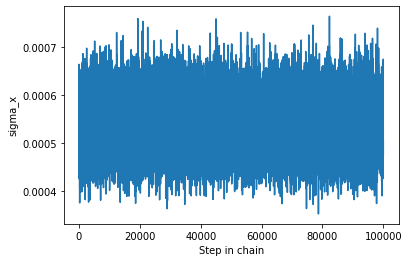

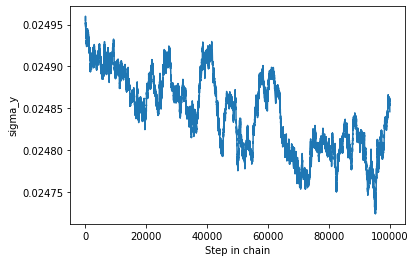

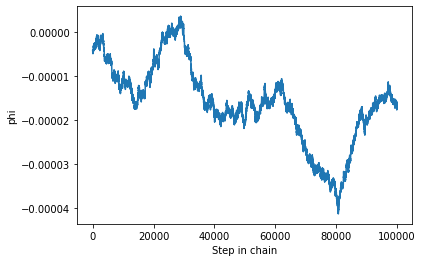

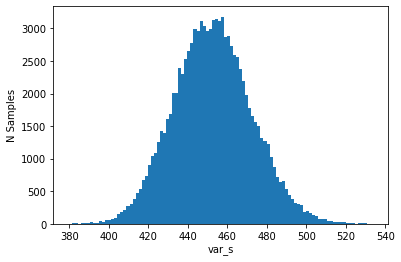

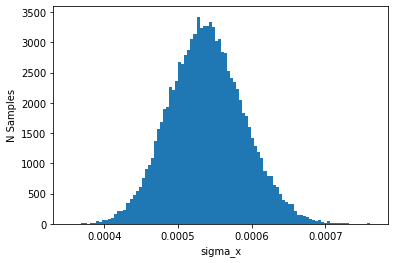

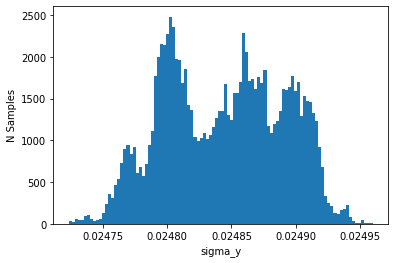

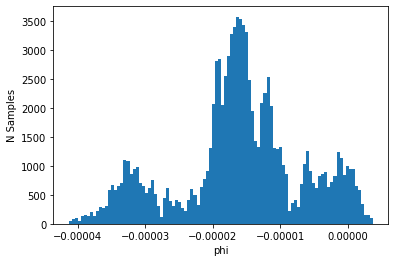

In [11]:
print(estimator.accept_fraction())
print(estimator.current_nll)
estimator.plot_samples()
estimator.plot_hist()

In [13]:
theta = estimator.calculate_mean()
print(f"var_s: {(theta[0]*u.mas)}")
print(f"sigma_x: {(theta[1]*u.deg).to(u.mas)}")
print(f"sigma_y: {(theta[2]*u.deg).to(u.mas)}")
print(f"phi: {(theta[3]*u.rad).to(u.mas)}")
theta

var_s: 452.57586221783674 mas
sigma_x: 1940.1175898956724 mas
sigma_y: 89439.24758986874 mas
phi: -3315.371156215859 mas


array([ 4.52575862e+02,  5.38921553e-04,  2.48442354e-02, -1.60733729e-05])

In [ ]:
%%time
GP = gpr.GPR(
    '/media/data/austinfortino/austinFull.fits',
    500,
    sample=None,
    verbose=False,
    eps=0,
    test_size=0.2,
    random_state=0,
    tensor=False)
GP.fit(theta)

Current Log Marginal Likelihood: -100797.04034486257
Standard deviation of validation residuals: dx 19.853, dy 18.528
Standard deviation of Gaussian Process residuals: dx 8.618, dy 7.287
The ratio of std(valid) / std(GP): dx 2.304, dy 2.543


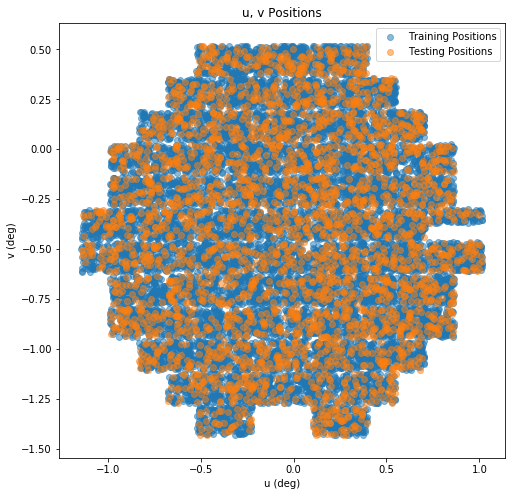

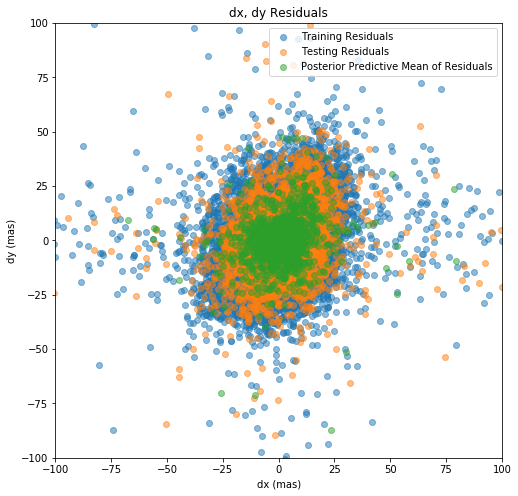

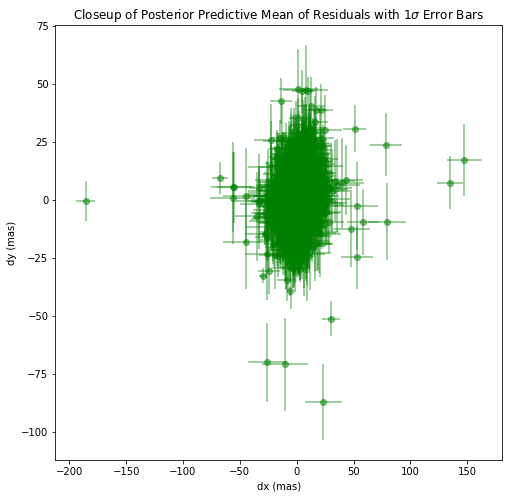

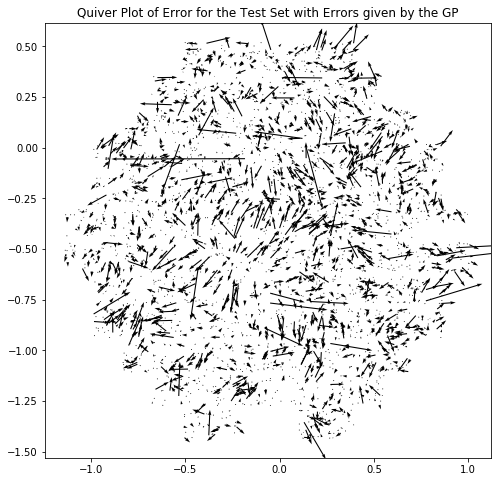

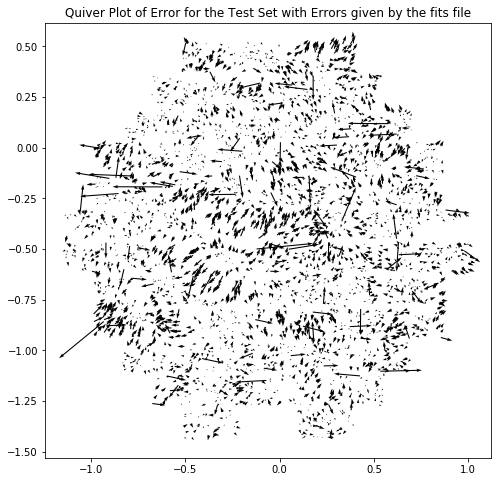

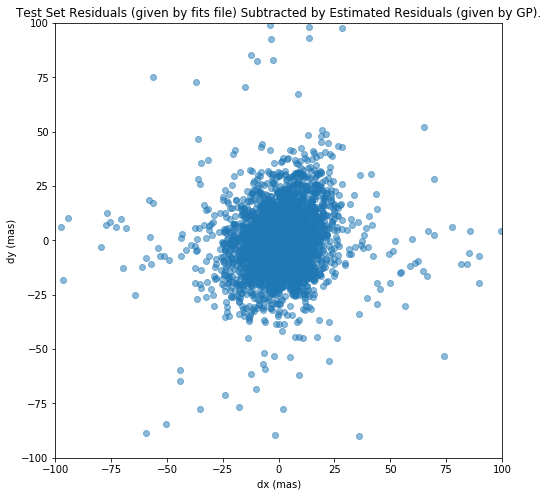

In [14]:
GP.summary()